# Helper Functions

In [1]:
import os
root_path = '/raid/ee-mariyam/maryam/abhijeet/Combined_Files'
def get_jpg_paths(base_dir):
    jpg_dict = {}
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            jpg_paths = []
            
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, file_name)
                    jpg_paths.append(file_path)
            
            if jpg_paths:
                jpg_dict[folder_name] = jpg_paths
    
    return jpg_dict

combined_files_path = root_path
jpg_paths_dict = get_jpg_paths(combined_files_path)


In [2]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F 
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
def evaluate_model(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_labels, all_preds



In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, num_classes, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies):

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classwise_accuracy(cm, jpg_paths_dict):
    total_accuracy = np.trace(cm) / np.sum(cm)

    classwise_accuracy = cm.diagonal() / cm.sum(axis=1)

    class_names = list(jpg_paths_dict.keys())  
    classwise_accuracy = [
        acc if cm.sum(axis=1)[i] > 0 else np.nan
        for i, acc in enumerate(classwise_accuracy)
    ]

    print(f"Total Accuracy: {total_accuracy * 100:.2f}%")
    for i, accuracy in enumerate(classwise_accuracy):
        if np.isnan(accuracy):
            print(f"Class '{class_names[i]}' Accuracy: N/A (no samples)")
        else:
            print(f"Class '{class_names[i]}' Accuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, classwise_accuracy, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 1)  
    plt.axhline(total_accuracy, color='red', linestyle='--', label='Total Accuracy')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()  
    plt.show()

In [ ]:
jpg_paths_comb_dict = jpg_paths_dict.copy()
anthra = jpg_paths_comb_dict['Anthracnose']
twist = jpg_paths_comb_dict['Twister']
antra_twist = anthra+twist
jpg_paths_comb_dict['Antracnose_Twister'] = antra_twist

jpg_paths_comb_dict.pop('Anthracnose', None)
jpg_paths_comb_dict.pop('Twister', None)


['/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6556.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094620957.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6553.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094709204.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3270.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 17.11.2023 DSC_6919.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 06.10.2023 IMG_20231006_163321~2.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 07.10.2023 IMG20231007113350.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S 

In [ ]:
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Purple_Blotch
Number of JPEG files: 406

Subfolder: Thrips
Number of JPEG files: 546

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Healthy
Number of JPEG files: 1072

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: Stemphylium
Number of JPEG files: 661

Subfolder: Antracnose_Twister
Number of JPEG files: 1082



In [ ]:

from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224))  
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


## New

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision

In [ ]:
def get_class_specific_augmentations(class_name):
    resize = A.Resize(224, 224)  

    base_transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.OneOf([
            A.MotionBlur(p=0.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(),
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
        resize, 
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

    if class_name in ['Purple_Blotch', 'Stemphylium']:
        return A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomRotate90(p=0.5),
            A.OneOf([
                A.MotionBlur(p=0.2),
                A.MedianBlur(blur_limit=3, p=0.1),
                A.Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            A.OneOf([
                A.CLAHE(clip_limit=2),
                A.RandomBrightnessContrast(),
            ], p=0.3),
            A.HueSaturationValue(p=0.3),
            A.RandomGridShuffle(grid=(2, 2), p=0.3),
            A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=0.5),
            A.GaussNoise(var_limit=(10.0, 50.0), p=0.4),
            resize,  
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ToTensorV2()
        ])

    return base_transform


In [ ]:

class BalancedDataset(CustomImageDataset):
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        class_name = list(self.label_map.keys())[list(self.label_map.values()).index(label)]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is None or image.size == 0:
                raise ValueError("Invalid image")
        except Exception:
            image = np.zeros((224, 224, 3), dtype=np.uint8)  

    
        aug = get_class_specific_augmentations(class_name)
        augmented = aug(image=image)
        image = augmented['image']

        return image.contiguous(), label



In [ ]:
dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict)
labels = np.array(dataset.labels)

import numpy as np
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold

num_total = len(dataset)
num_train_val = int(0.8 * num_total)
num_test = num_total - num_train_val
indices = np.arange(num_total)
np.random.seed(42)
np.random.shuffle(indices)

train_val_indices = indices[:num_train_val]
test_indices = indices[num_train_val:]

train_val_labels = labels[train_val_indices]
test_labels = labels[test_indices]
train_val_dataset = Subset(dataset, train_val_indices)
test_dataset = Subset(dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=64)

In [ ]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[406, 546, 754, 1072, 669, 140, 661, 1082]
tensor([2.6650, 1.9817, 1.4350, 1.0093, 1.6173, 7.7286, 1.6369, 1.0000],
       device='cuda:0')


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class DenseNet121MLP(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.base = models.densenet121(pretrained=True)
        
        self.base.classifier = nn.Identity() 
        
        self.mlp = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        features = self.base.features(x)  
        out = nn.functional.adaptive_avg_pool2d(features, (1, 1)).view(features.size(0), -1)  
        out = self.mlp(out)
        return out


In [ ]:
class_names = jpg_paths_comb_dict.keys()


In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, fold=None, save_dir='./Models', final=False):
    best_acc = 0.0
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects / total

        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_corrects += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects / val_total

        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(epoch_acc)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} '
              f'Train Loss: {epoch_loss:.4f} Train Accuracy: {epoch_acc:.4f} '
              f'Val Loss: {val_loss:.4f} Val Accuracy: {val_acc:.4f}')

        if not final and val_acc > best_acc:
            best_acc = val_acc
            save_path = f'{save_dir}/model_fold_only_albumentation_{fold}.pth'
            torch.save(model.state_dict(), save_path)
            print(f'Saved best model for fold {fold} with accuracy: {best_acc:.4f}')

    if final:
        save_path = f'{save_dir}/final_model_only_albumentation.pth'
        torch.save(model.state_dict(), save_path)
        print(f'Final model saved to {save_path}')
    else:
        print(f'Best Validation Accuracy for fold {fold}: {best_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies, (best_acc if not final else None)


In [ ]:
import torch
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
class_names = list(jpg_paths_comb_dict.keys())

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_train_losses = []
fold_val_losses = []
fold_train_accuracies = []
fold_val_accuracies = []
fold_best_accuracies = []

all_true_labels_cv = []
all_pred_labels_cv = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_indices, train_val_labels)):
    print(f"\n--- Fold {fold + 1} ---")

    fold_train_dataset = Subset(train_val_dataset, train_idx)
    fold_val_dataset = Subset(train_val_dataset, val_idx)

    train_loader = DataLoader(fold_train_dataset, batch_size=32, shuffle=True, num_workers=64)
    val_loader = DataLoader(fold_val_dataset, batch_size=32, shuffle=False, num_workers=64)

    model = DenseNet121MLP(num_classes=8).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    train_losses, val_losses, train_accs, val_accs, best_acc = train_model(
        model, train_loader, val_loader, criterion, optimizer, device,
        num_epochs=20, fold=fold, save_dir='./Models/CV/', final=False
    )

    fold_train_losses.append(train_losses[-1])
    fold_val_losses.append(val_losses[-1])
    fold_train_accuracies.append(train_accs[-1])
    fold_val_accuracies.append(val_accs[-1])
    fold_best_accuracies.append(best_acc)

    model.eval()
    val_true_labels = []
    val_pred_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_true_labels.extend(labels.cpu().numpy())
            val_pred_labels.extend(preds.cpu().numpy())

    all_true_labels_cv.extend(val_true_labels)
    all_pred_labels_cv.extend(val_pred_labels)

print("\n=== Cross Validation Metrics ===")
print(f"Overall CV Accuracy: {accuracy_score(all_true_labels_cv, all_pred_labels_cv):.4f}")
print(classification_report(all_true_labels_cv, all_pred_labels_cv, target_names=class_names))



--- Fold 1 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.1124 Train Accuracy: 0.6599 Val Loss: 0.5055 Val Accuracy: 0.8312
Saved best model for fold 0 with accuracy: 0.8312


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4549 Train Accuracy: 0.8391 Val Loss: 0.3532 Val Accuracy: 0.8640
Saved best model for fold 0 with accuracy: 0.8640


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.3652 Train Accuracy: 0.8625 Val Loss: 0.3489 Val Accuracy: 0.8757
Saved best model for fold 0 with accuracy: 0.8757


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.3047 Train Accuracy: 0.8895 Val Loss: 0.3255 Val Accuracy: 0.8875
Saved best model for fold 0 with accuracy: 0.8875


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.2513 Train Accuracy: 0.9033 Val Loss: 0.2990 Val Accuracy: 0.9050
Saved best model for fold 0 with accuracy: 0.9050


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.2301 Train Accuracy: 0.9164 Val Loss: 0.2735 Val Accuracy: 0.9062
Saved best model for fold 0 with accuracy: 0.9062


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.1981 Train Accuracy: 0.9258 Val Loss: 0.2936 Val Accuracy: 0.9121
Saved best model for fold 0 with accuracy: 0.9121


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.1975 Train Accuracy: 0.9311 Val Loss: 0.2478 Val Accuracy: 0.9191
Saved best model for fold 0 with accuracy: 0.9191


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.1641 Train Accuracy: 0.9376 Val Loss: 0.2654 Val Accuracy: 0.9250
Saved best model for fold 0 with accuracy: 0.9250


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.1859 Train Accuracy: 0.9326 Val Loss: 0.2749 Val Accuracy: 0.9132


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.1459 Train Accuracy: 0.9481 Val Loss: 0.2890 Val Accuracy: 0.9261
Saved best model for fold 0 with accuracy: 0.9261


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.1225 Train Accuracy: 0.9595 Val Loss: 0.2998 Val Accuracy: 0.9250


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.1371 Train Accuracy: 0.9507 Val Loss: 0.3725 Val Accuracy: 0.9074


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.1141 Train Accuracy: 0.9604 Val Loss: 0.3190 Val Accuracy: 0.9496
Saved best model for fold 0 with accuracy: 0.9496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.1203 Train Accuracy: 0.9598 Val Loss: 0.4002 Val Accuracy: 0.9308


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.1132 Train Accuracy: 0.9590 Val Loss: 0.2632 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.1065 Train Accuracy: 0.9639 Val Loss: 0.3379 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0843 Train Accuracy: 0.9707 Val Loss: 0.3392 Val Accuracy: 0.9297


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.1310 Train Accuracy: 0.9563 Val Loss: 0.2614 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.1222 Train Accuracy: 0.9634 Val Loss: 0.2546 Val Accuracy: 0.9390
Best Validation Accuracy for fold 0: 0.9496


Corrupt JPEG data: premature end of data segment



--- Fold 2 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.1093 Train Accuracy: 0.6711 Val Loss: 0.4809 Val Accuracy: 0.8359
Saved best model for fold 1 with accuracy: 0.8359


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4658 Train Accuracy: 0.8308 Val Loss: 0.3525 Val Accuracy: 0.8558
Saved best model for fold 1 with accuracy: 0.8558


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.3499 Train Accuracy: 0.8657 Val Loss: 0.3582 Val Accuracy: 0.8441


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.3119 Train Accuracy: 0.8824 Val Loss: 0.3017 Val Accuracy: 0.8968
Saved best model for fold 1 with accuracy: 0.8968


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.2577 Train Accuracy: 0.9053 Val Loss: 0.2484 Val Accuracy: 0.9050
Saved best model for fold 1 with accuracy: 0.9050


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.2206 Train Accuracy: 0.9173 Val Loss: 0.2299 Val Accuracy: 0.9226
Saved best model for fold 1 with accuracy: 0.9226


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.2464 Train Accuracy: 0.9097 Val Loss: 0.2774 Val Accuracy: 0.9144


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.2004 Train Accuracy: 0.9305 Val Loss: 0.2265 Val Accuracy: 0.9379
Saved best model for fold 1 with accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.1847 Train Accuracy: 0.9326 Val Loss: 0.3038 Val Accuracy: 0.9320


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.1559 Train Accuracy: 0.9484 Val Loss: 0.2669 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.1651 Train Accuracy: 0.9402 Val Loss: 0.2247 Val Accuracy: 0.9191


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.1402 Train Accuracy: 0.9490 Val Loss: 0.3677 Val Accuracy: 0.9132


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.1607 Train Accuracy: 0.9422 Val Loss: 0.2830 Val Accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.1514 Train Accuracy: 0.9434 Val Loss: 0.2247 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.1348 Train Accuracy: 0.9554 Val Loss: 0.2509 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.1396 Train Accuracy: 0.9543 Val Loss: 0.2435 Val Accuracy: 0.9238


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.1105 Train Accuracy: 0.9666 Val Loss: 0.2842 Val Accuracy: 0.9367


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.1073 Train Accuracy: 0.9619 Val Loss: 0.2020 Val Accuracy: 0.9472
Saved best model for fold 1 with accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0990 Train Accuracy: 0.9686 Val Loss: 0.2760 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.1234 Train Accuracy: 0.9631 Val Loss: 0.2493 Val Accuracy: 0.9390
Best Validation Accuracy for fold 1: 0.9472


Corrupt JPEG data: premature end of data segment



--- Fold 3 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.1268 Train Accuracy: 0.6796 Val Loss: 0.4982 Val Accuracy: 0.7972
Saved best model for fold 2 with accuracy: 0.7972


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4592 Train Accuracy: 0.8250 Val Loss: 0.4421 Val Accuracy: 0.8664
Saved best model for fold 2 with accuracy: 0.8664


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.3676 Train Accuracy: 0.8684 Val Loss: 0.3901 Val Accuracy: 0.8300


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.3073 Train Accuracy: 0.8877 Val Loss: 0.3084 Val Accuracy: 0.8699
Saved best model for fold 2 with accuracy: 0.8699


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.2403 Train Accuracy: 0.9120 Val Loss: 0.3272 Val Accuracy: 0.8804
Saved best model for fold 2 with accuracy: 0.8804


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.2624 Train Accuracy: 0.9079 Val Loss: 0.2806 Val Accuracy: 0.9109
Saved best model for fold 2 with accuracy: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.2019 Train Accuracy: 0.9267 Val Loss: 0.2823 Val Accuracy: 0.8992


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.1902 Train Accuracy: 0.9337 Val Loss: 0.2726 Val Accuracy: 0.9121
Saved best model for fold 2 with accuracy: 0.9121


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.1961 Train Accuracy: 0.9285 Val Loss: 0.2786 Val Accuracy: 0.9004


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.1716 Train Accuracy: 0.9384 Val Loss: 0.2154 Val Accuracy: 0.9261
Saved best model for fold 2 with accuracy: 0.9261


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.1466 Train Accuracy: 0.9481 Val Loss: 0.2674 Val Accuracy: 0.9144


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.1566 Train Accuracy: 0.9443 Val Loss: 0.4873 Val Accuracy: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.1583 Train Accuracy: 0.9449 Val Loss: 0.3034 Val Accuracy: 0.9074


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.1345 Train Accuracy: 0.9528 Val Loss: 0.3080 Val Accuracy: 0.9074


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.1372 Train Accuracy: 0.9537 Val Loss: 0.3409 Val Accuracy: 0.9179


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.1204 Train Accuracy: 0.9572 Val Loss: 0.3059 Val Accuracy: 0.9261


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.1034 Train Accuracy: 0.9631 Val Loss: 0.2201 Val Accuracy: 0.9472
Saved best model for fold 2 with accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.1121 Train Accuracy: 0.9631 Val Loss: 0.2085 Val Accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0910 Train Accuracy: 0.9716 Val Loss: 0.2749 Val Accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0759 Train Accuracy: 0.9739 Val Loss: 0.4189 Val Accuracy: 0.9039
Best Validation Accuracy for fold 2: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment



--- Fold 4 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.1026 Train Accuracy: 0.6884 Val Loss: 0.4890 Val Accuracy: 0.8183
Saved best model for fold 3 with accuracy: 0.8183


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4318 Train Accuracy: 0.8443 Val Loss: 0.3719 Val Accuracy: 0.8535
Saved best model for fold 3 with accuracy: 0.8535


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.3292 Train Accuracy: 0.8760 Val Loss: 0.3698 Val Accuracy: 0.8945
Saved best model for fold 3 with accuracy: 0.8945


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.2865 Train Accuracy: 0.8950 Val Loss: 0.3238 Val Accuracy: 0.8851


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.2373 Train Accuracy: 0.9123 Val Loss: 0.3384 Val Accuracy: 0.8640


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.2085 Train Accuracy: 0.9200 Val Loss: 0.3253 Val Accuracy: 0.8968
Saved best model for fold 3 with accuracy: 0.8968


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.1964 Train Accuracy: 0.9282 Val Loss: 0.3145 Val Accuracy: 0.8957


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.2014 Train Accuracy: 0.9267 Val Loss: 0.2752 Val Accuracy: 0.8968


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.1742 Train Accuracy: 0.9417 Val Loss: 0.3191 Val Accuracy: 0.9050
Saved best model for fold 3 with accuracy: 0.9050


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.1665 Train Accuracy: 0.9422 Val Loss: 0.3209 Val Accuracy: 0.9039


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.1635 Train Accuracy: 0.9434 Val Loss: 0.2957 Val Accuracy: 0.9179
Saved best model for fold 3 with accuracy: 0.9179


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.1494 Train Accuracy: 0.9507 Val Loss: 0.2728 Val Accuracy: 0.9203
Saved best model for fold 3 with accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.1278 Train Accuracy: 0.9531 Val Loss: 0.2771 Val Accuracy: 0.9215
Saved best model for fold 3 with accuracy: 0.9215


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.1246 Train Accuracy: 0.9581 Val Loss: 0.3182 Val Accuracy: 0.9015


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.1330 Train Accuracy: 0.9572 Val Loss: 0.3645 Val Accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.1413 Train Accuracy: 0.9516 Val Loss: 0.2447 Val Accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.1056 Train Accuracy: 0.9645 Val Loss: 0.2354 Val Accuracy: 0.9332
Saved best model for fold 3 with accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.1072 Train Accuracy: 0.9598 Val Loss: 0.2743 Val Accuracy: 0.9379
Saved best model for fold 3 with accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0759 Train Accuracy: 0.9771 Val Loss: 0.3004 Val Accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0871 Train Accuracy: 0.9678 Val Loss: 0.3398 Val Accuracy: 0.9250
Best Validation Accuracy for fold 3: 0.9379

--- Fold 5 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 1.1240 Train Accuracy: 0.6515 Val Loss: 0.4959 Val Accuracy: 0.8228
Saved best model for fold 4 with accuracy: 0.8228


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.4499 Train Accuracy: 0.8321 Val Loss: 0.3617 Val Accuracy: 0.8357
Saved best model for fold 4 with accuracy: 0.8357


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.3720 Train Accuracy: 0.8567 Val Loss: 0.3564 Val Accuracy: 0.8885
Saved best model for fold 4 with accuracy: 0.8885


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.2817 Train Accuracy: 0.8977 Val Loss: 0.3404 Val Accuracy: 0.8603


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.2289 Train Accuracy: 0.9185 Val Loss: 0.2682 Val Accuracy: 0.8838


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.1984 Train Accuracy: 0.9285 Val Loss: 0.4015 Val Accuracy: 0.9002
Saved best model for fold 4 with accuracy: 0.9002


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.1967 Train Accuracy: 0.9291 Val Loss: 0.3605 Val Accuracy: 0.8932


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.1984 Train Accuracy: 0.9341 Val Loss: 0.3097 Val Accuracy: 0.8991


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.2049 Train Accuracy: 0.9256 Val Loss: 0.3554 Val Accuracy: 0.9143
Saved best model for fold 4 with accuracy: 0.9143


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.1614 Train Accuracy: 0.9467 Val Loss: 0.3232 Val Accuracy: 0.8967


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.1599 Train Accuracy: 0.9475 Val Loss: 0.3243 Val Accuracy: 0.9155
Saved best model for fold 4 with accuracy: 0.9155


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.1486 Train Accuracy: 0.9481 Val Loss: 0.3229 Val Accuracy: 0.9131


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.1235 Train Accuracy: 0.9557 Val Loss: 0.2736 Val Accuracy: 0.9261
Saved best model for fold 4 with accuracy: 0.9261


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.1321 Train Accuracy: 0.9563 Val Loss: 0.3547 Val Accuracy: 0.9202


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.1257 Train Accuracy: 0.9540 Val Loss: 0.2789 Val Accuracy: 0.9225


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0998 Train Accuracy: 0.9675 Val Loss: 0.3660 Val Accuracy: 0.9390
Saved best model for fold 4 with accuracy: 0.9390


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0833 Train Accuracy: 0.9678 Val Loss: 0.3009 Val Accuracy: 0.9308


Corrupt JPEG data: premature end of data segment


In [ ]:
import numpy as np

print("\n=== 5-Fold Cross Validation Summary ===")
print(f"Average Train Accuracy: {np.mean(fold_train_accuracies):.4f} ± {np.std(fold_train_accuracies):.4f}")
print(f"Average Val Accuracy:   {np.mean(fold_val_accuracies):.4f} ± {np.std(fold_val_accuracies):.4f}")
print(f"Average Train Loss:     {np.mean(fold_train_losses):.4f} ± {np.std(fold_train_losses):.4f}")
print(f"Average Val Loss:       {np.mean(fold_val_losses):.4f} ± {np.std(fold_val_losses):.4f}")


In [ ]:
import torch
import time
import copy
import os

def train_model_v2(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, fold=None, save_dir='./Models', final=False):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 30)

        model.train()
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = running_corrects.double() / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            val_corrects = 0
            val_total = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)
                    val_loss += loss.item() * inputs.size(0)
                    val_corrects += torch.sum(preds == labels.data)
                    val_total += labels.size(0)

            epoch_val_loss = val_loss / val_total
            epoch_val_acc = val_corrects.double() / val_total
            val_losses.append(epoch_val_loss)
            val_accuracies.append(epoch_val_acc.item())

            print(f'Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')

            if not final and epoch_val_acc > best_acc:
                best_acc = epoch_val_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                os.makedirs(save_dir, exist_ok=True)
                save_path = os.path.join(save_dir, f'model_fold_only_albumentation_{fold}.pth')
                torch.save(best_model_wts, save_path)
                print(f'--> Best model saved for fold {fold} with acc {best_acc:.4f}')
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    if final:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, 'final_model_only_albumentation.pth')
        torch.save(model.state_dict(), save_path)
        print(f'Final model saved to {save_path}')
    elif best_acc > 0.0:
        model.load_state_dict(best_model_wts)
        print(f'Loaded best model weights with acc: {best_acc:.4f}')
        return train_losses, val_losses, train_accuracies, val_accuracies, best_acc
    else:
        print(f'No validation provided. Final training metrics only.')

    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
import matplotlib.pyplot as plt
import os

full_train_loader = DataLoader(train_val_dataset, batch_size=32, shuffle=True, num_workers=64)

final_model = DenseNet121MLP(num_classes=8).to(device)
criterion = nn.CrossEntropyLoss(weight= class_weights)
optimizer = torch.optim.Adam(final_model.parameters(), lr=1e-4)

train_losses, val_losses, train_accs, val_accs = train_model_v2(
    model=final_model,
    train_loader=full_train_loader,
    val_loader=None,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=20,
    final=True,
    save_dir='./Models'
)


os.makedirs('./Models', exist_ok=True)
torch.save(final_model.state_dict(), './Models/final_model_only_albumentation.pth')
print("Saved final model to ./Models/final_model.pth")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.legend()
plt.show()


In [ ]:
final_model.eval()
all_true = []
all_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = final_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_true.extend(labels.cpu().numpy())
        all_pred.extend(preds.cpu().numpy())


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

acc = accuracy_score(all_true, all_pred)
print(f"Test Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(all_true, all_pred, target_names=dataset.label_map.keys()))

cm = confusion_matrix(all_true, all_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(dataset.label_map.keys()))

fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

model = models.densenet121(pretrained=True)

in_features = model.classifier.in_features  

mlp_classifier = nn.Sequential(
    nn.Linear(in_features, 512),  
    nn.ReLU(),                    
    nn.Dropout(0.5),             
    nn.Linear(512, 256),          
    nn.ReLU(),                  
    nn.Dropout(0.5),             
    nn.Linear(256, num_classes)  
)
model.classifier = mlp_classifier

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = MarginLoss(margin=1.0, num_classes=num_classes)

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)


In [ ]:

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    best_acc = 0.0
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects / total

        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_running_loss += loss.item() * inputs.size(0)
                
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_corrects += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects / val_total

        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(epoch_acc)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} '
              f'Train Loss: {epoch_loss:.4f} Train Accuracy: {epoch_acc:.4f} '
              f'Val Loss: {val_loss:.4f} Val Accuracy: {val_acc:.4f}')

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'denset121_only_annotation.pth')
            print(f'Saved best model with accuracy: {best_acc:.4f}')

    print('Training complete.')
    print(f'Best Validation Accuracy: {best_acc:.4f}')
    return train_losses, val_losses, train_accuracies, val_accuracies





In [ ]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_sampler = get_sampler(train_dataset)
val_sampler = get_sampler(val_dataset)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler, num_workers=64)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, sampler = val_sampler, num_workers=64)

In [ ]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[406, 546, 754, 1072, 669, 140, 661, 1082]
tensor([2.6650, 1.9817, 1.4350, 1.0093, 1.6173, 7.7286, 1.6369, 1.0000],
       device='cuda:0')


In [ ]:

train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/50 Train Loss: 0.4618 Train Accuracy: 0.7662 Val Loss: 0.7945 Val Accuracy: 0.7824
Saved best model with accuracy: 0.7824


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/50 Train Loss: 0.4090 Train Accuracy: 0.7927 Val Loss: 0.9473 Val Accuracy: 0.6548


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/50 Train Loss: 0.3950 Train Accuracy: 0.8061 Val Loss: 0.6050 Val Accuracy: 0.8227
Saved best model with accuracy: 0.8227


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/50 Train Loss: 0.3376 Train Accuracy: 0.8344 Val Loss: 1.0088 Val Accuracy: 0.8124


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/50 Train Loss: 0.2940 Train Accuracy: 0.8490 Val Loss: 0.5059 Val Accuracy: 0.8161


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/50 Train Loss: 0.2822 Train Accuracy: 0.8558 Val Loss: 1.0543 Val Accuracy: 0.8349
Saved best model with accuracy: 0.8349


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/50 Train Loss: 0.2661 Train Accuracy: 0.8656 Val Loss: 0.4207 Val Accuracy: 0.8405
Saved best model with accuracy: 0.8405


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/50 Train Loss: 0.2626 Train Accuracy: 0.8649 Val Loss: 0.5136 Val Accuracy: 0.8565
Saved best model with accuracy: 0.8565


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/50 Train Loss: 0.2501 Train Accuracy: 0.8696 Val Loss: 0.3601 Val Accuracy: 0.8724
Saved best model with accuracy: 0.8724


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/50 Train Loss: 0.2407 Train Accuracy: 0.8766 Val Loss: 0.4881 Val Accuracy: 0.8321


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/50 Train Loss: 0.2492 Train Accuracy: 0.8764 Val Loss: 0.3264 Val Accuracy: 0.8865
Saved best model with accuracy: 0.8865


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/50 Train Loss: 0.1809 Train Accuracy: 0.9013 Val Loss: 0.6959 Val Accuracy: 0.8799


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/50 Train Loss: 0.1931 Train Accuracy: 0.8994 Val Loss: 0.3775 Val Accuracy: 0.8987
Saved best model with accuracy: 0.8987


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/50 Train Loss: 0.2599 Train Accuracy: 0.8722 Val Loss: 0.9841 Val Accuracy: 0.7402


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/50 Train Loss: 0.1823 Train Accuracy: 0.9038 Val Loss: 0.3656 Val Accuracy: 0.8856


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/50 Train Loss: 0.1718 Train Accuracy: 0.9111 Val Loss: 0.4814 Val Accuracy: 0.8715


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/50 Train Loss: 0.1450 Train Accuracy: 0.9233 Val Loss: 0.4058 Val Accuracy: 0.8677


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/50 Train Loss: 0.2207 Train Accuracy: 0.8856 Val Loss: 0.7178 Val Accuracy: 0.8537


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/50 Train Loss: 0.1614 Train Accuracy: 0.9170 Val Loss: 0.4202 Val Accuracy: 0.9015
Saved best model with accuracy: 0.9015


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/50 Train Loss: 0.1837 Train Accuracy: 0.9053 Val Loss: 0.4733 Val Accuracy: 0.8687


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 21/50 Train Loss: 0.1218 Train Accuracy: 0.9334 Val Loss: 0.4029 Val Accuracy: 0.9296
Saved best model with accuracy: 0.9296


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 22/50 Train Loss: 0.1260 Train Accuracy: 0.9343 Val Loss: 0.5067 Val Accuracy: 0.8846


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 23/50 Train Loss: 0.1238 Train Accuracy: 0.9376 Val Loss: 0.5446 Val Accuracy: 0.8996


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 24/50 Train Loss: 0.1356 Train Accuracy: 0.9355 Val Loss: 0.4099 Val Accuracy: 0.8902


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 25/50 Train Loss: 0.1208 Train Accuracy: 0.9404 Val Loss: 0.4518 Val Accuracy: 0.9128


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 26/50 Train Loss: 0.1123 Train Accuracy: 0.9423 Val Loss: 0.7998 Val Accuracy: 0.8696


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 27/50 Train Loss: 0.1709 Train Accuracy: 0.9149 Val Loss: 0.8170 Val Accuracy: 0.8377


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 28/50 Train Loss: 0.1602 Train Accuracy: 0.9228 Val Loss: 0.4106 Val Accuracy: 0.8931


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 29/50 Train Loss: 0.1160 Train Accuracy: 0.9404 Val Loss: 0.5104 Val Accuracy: 0.8940


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 30/50 Train Loss: 0.1245 Train Accuracy: 0.9369 Val Loss: 0.4172 Val Accuracy: 0.8912


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 31/50 Train Loss: 0.0958 Train Accuracy: 0.9522 Val Loss: 0.9208 Val Accuracy: 0.9137


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 32/50 Train Loss: 0.0673 Train Accuracy: 0.9660 Val Loss: 0.4071 Val Accuracy: 0.9231


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 33/50 Train Loss: 0.0963 Train Accuracy: 0.9529 Val Loss: 0.3366 Val Accuracy: 0.9353
Saved best model with accuracy: 0.9353


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 34/50 Train Loss: 0.0885 Train Accuracy: 0.9554 Val Loss: 0.5803 Val Accuracy: 0.9212


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 35/50 Train Loss: 0.0890 Train Accuracy: 0.9559 Val Loss: 0.9327 Val Accuracy: 0.8931


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 36/50 Train Loss: 0.0832 Train Accuracy: 0.9552 Val Loss: 0.6355 Val Accuracy: 0.8790


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 37/50 Train Loss: 0.0660 Train Accuracy: 0.9676 Val Loss: 0.5944 Val Accuracy: 0.9146


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 38/50 Train Loss: 0.1253 Train Accuracy: 0.9503 Val Loss: 0.6794 Val Accuracy: 0.8490


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 39/50 Train Loss: 0.3300 Train Accuracy: 0.8614 Val Loss: 0.5212 Val Accuracy: 0.8705


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 40/50 Train Loss: 0.1047 Train Accuracy: 0.9430 Val Loss: 0.5667 Val Accuracy: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 41/50 Train Loss: 0.1009 Train Accuracy: 0.9498 Val Loss: 0.4385 Val Accuracy: 0.9137


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 42/50 Train Loss: 0.0659 Train Accuracy: 0.9672 Val Loss: 0.3100 Val Accuracy: 0.9418
Saved best model with accuracy: 0.9418


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 43/50 Train Loss: 0.0972 Train Accuracy: 0.9517 Val Loss: 0.4888 Val Accuracy: 0.9231


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 44/50 Train Loss: 0.0795 Train Accuracy: 0.9578 Val Loss: 0.5157 Val Accuracy: 0.9221


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 45/50 Train Loss: 0.0724 Train Accuracy: 0.9625 Val Loss: 0.4178 Val Accuracy: 0.9212


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 46/50 Train Loss: 0.0809 Train Accuracy: 0.9573 Val Loss: 0.3269 Val Accuracy: 0.9174


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 47/50 Train Loss: 0.0594 Train Accuracy: 0.9700 Val Loss: 0.5177 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 48/50 Train Loss: 0.0494 Train Accuracy: 0.9733 Val Loss: 0.4395 Val Accuracy: 0.9325


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 49/50 Train Loss: 0.0529 Train Accuracy: 0.9737 Val Loss: 0.7029 Val Accuracy: 0.9212


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 50/50 Train Loss: 0.0765 Train Accuracy: 0.9634 Val Loss: 0.5256 Val Accuracy: 0.9268
Training complete.
Best Validation Accuracy: 0.9418


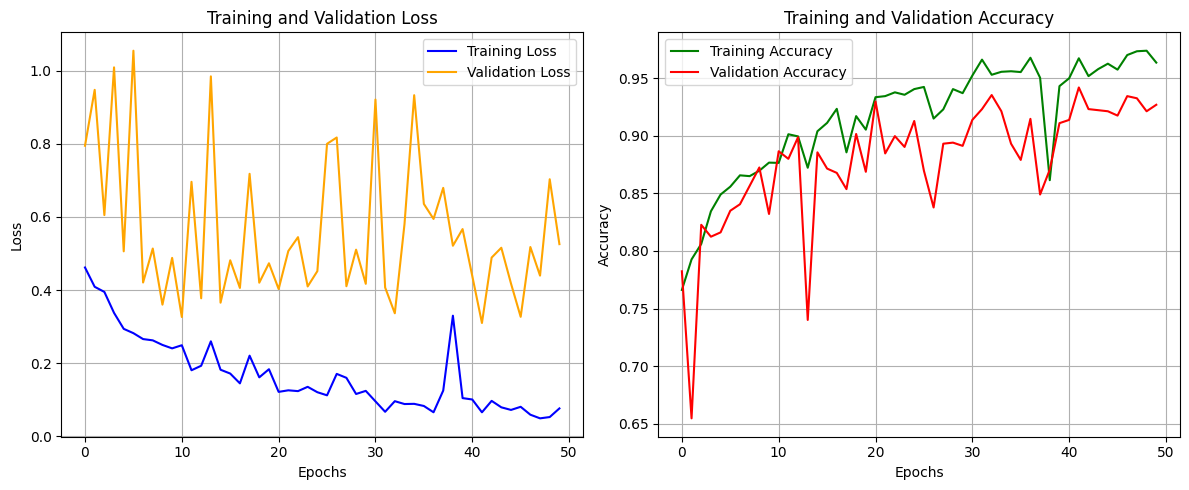

In [ ]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [ ]:
model.load_state_dict(torch.load('denset121_only_annotation.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

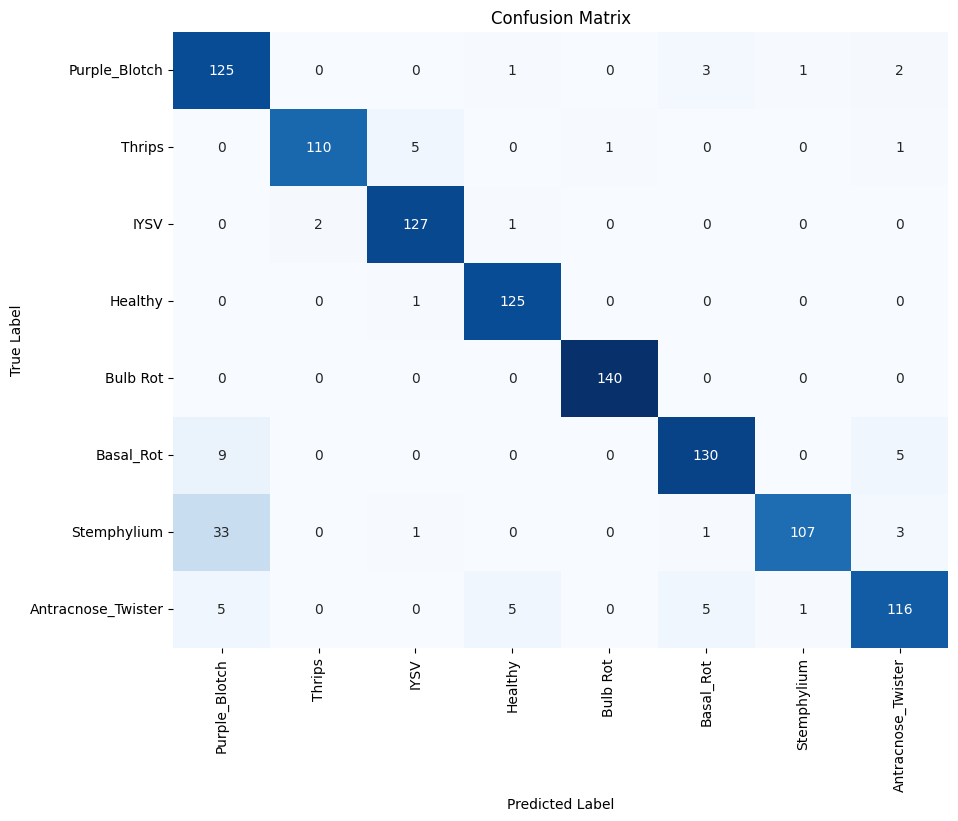

Total Accuracy: 91.93%
Class 'Purple_Blotch' Accuracy: 94.70%
Class 'Thrips' Accuracy: 94.02%
Class 'IYSV' Accuracy: 97.69%
Class 'Healthy' Accuracy: 99.21%
Class 'Bulb Rot' Accuracy: 100.00%
Class 'Basal_Rot' Accuracy: 90.28%
Class 'Stemphylium' Accuracy: 73.79%
Class 'Antracnose_Twister' Accuracy: 87.88%


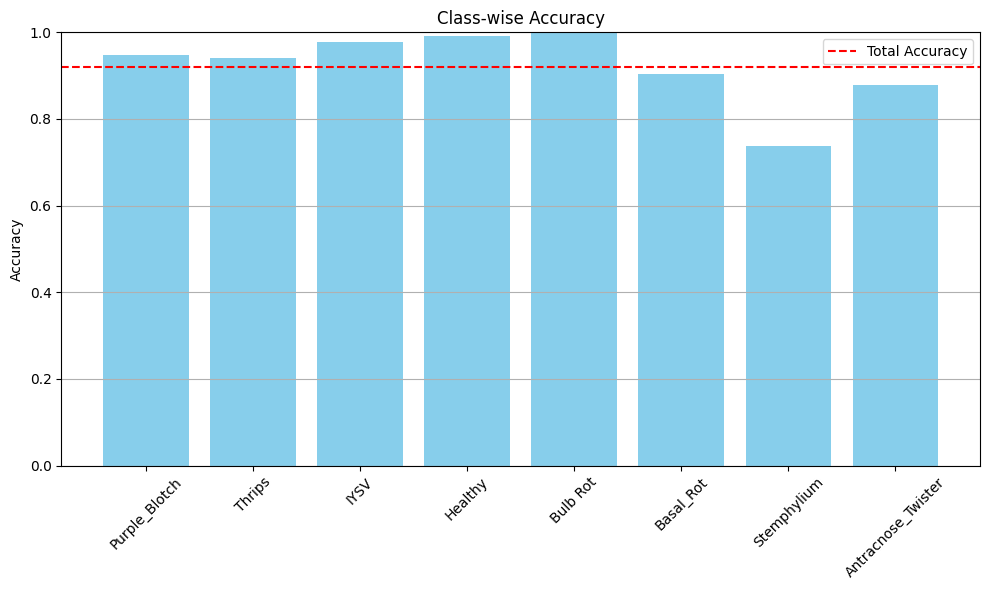

In [ ]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)